In [30]:
import sympy as sp
from sympy.abc import t, r, theta, phi
from einsteinpy.symbolic import MetricTensor, RicciTensor, RicciScalar, RiemannCurvatureTensor, EinsteinTensor
from einsteinpy.symbolic.christoffel import ChristoffelSymbols
import numpy as np
from IPython.display import Markdown as md
sp.init_printing()

### Parametrization of Mobius strip and metric tensor

In [4]:
x = (1+r * sp.cos(theta/2))*sp.cos(theta)
y = (1+r * sp.cos(theta/2))*sp.sin(theta)
z = r * sp.sin(theta/2)

In [5]:
dxu = x.diff(theta)
dxv = x.diff(r)
dyu = y.diff(theta)
dyv = y.diff(r)
dzu = z.diff(theta)
dzv = z.diff(r)

dtheta2 = (dxu**2 + dyu**2 + dzu**2).simplify()
dv2 = (dxv**2 + dyv**2 + dzv**2).simplify()

Line element is then 
$$
ds^s = dt^2 -dr^2 - \left(r^{2} \cos^{2}{\left(\frac{\theta}{2} \right)} + \frac{r^{2}}{4} + 2 r \cos{\left(\frac{\theta}{2} \right)} + 1 \right) d \theta^2 - d \phi^2
$$

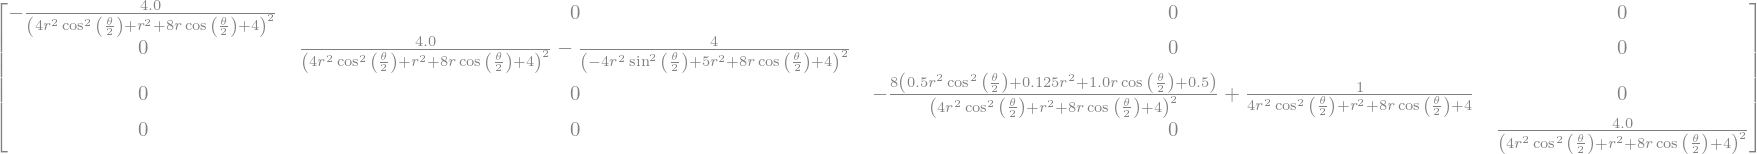

In [34]:
g = MetricTensor(
    sp.Array(
        np.diag([1, -1, dtheta2, -1]
               )
    ),
    syms=[t, r, theta, phi]
)
    
g.tensor()

einstein = EinsteinTensor.from_metric(g)
einstein.tensor()

out = "ds^2 ="
vars_ = ["t", "r", r"\theta", r"\phi"] 

for i in range(4):
    
    out += f"-\\left({sp.latex(einstein[i, i])}\\right)d{vars_[i]}^2"
    

md("$${}$$".format(out))

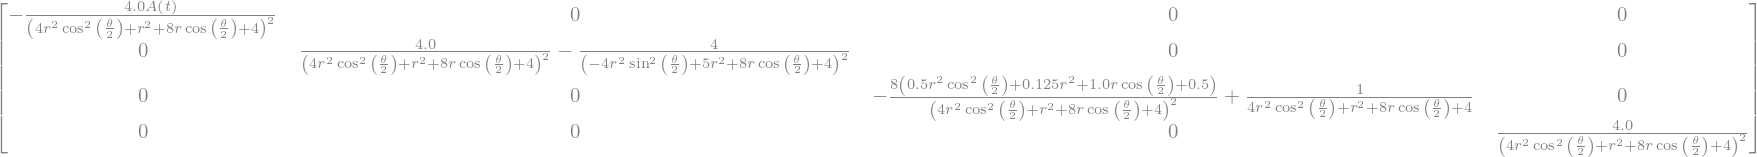

In [35]:
A = sp.Function("A")(t)
g = MetricTensor(
    sp.Array(
        np.diag([A, -1, dtheta2, -1]
               )
    ),
    syms=[t, r, theta, phi]
)
    
g.tensor()

einstein = EinsteinTensor.from_metric(g)
einstein.tensor()

In [36]:
B = sp.Function("B")(r)

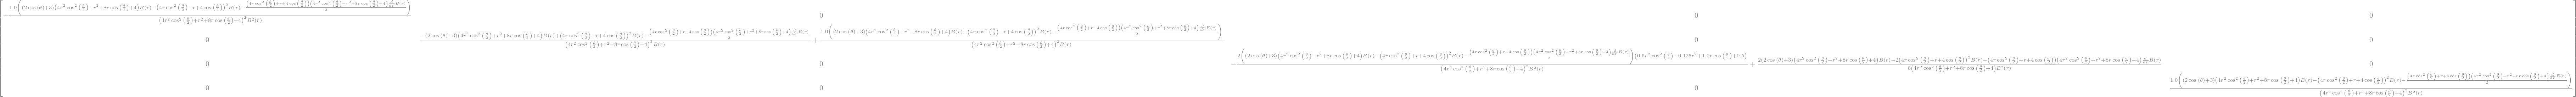

In [37]:
g = MetricTensor(
    sp.Array(
        np.diag([1, -B, dtheta2, -1]
               )
    ),
    syms=[t, r, theta, phi]
)
    
g.tensor()

einstein = EinsteinTensor.from_metric(g)
einstein.tensor()

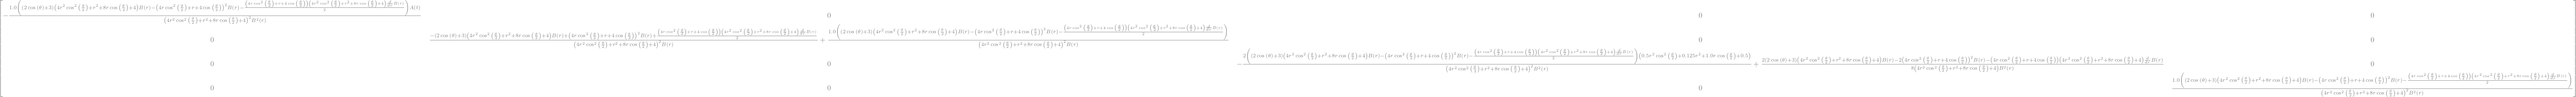